Training KNN model to detect credit card defaulter prediction

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# libraries to do statistical analysis
import math
from scipy.stats import *

# libraries used to pre-process
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# libraries used to implement models
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier



# libraries to evaluate performance
import sklearn.metrics as metrics
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings("ignore")

# to set max column display
pd.pandas.set_option('display.max_columns',None)

Loading Dataset

In [57]:
dataset = pd.read_csv('/content/default of credit card clients.xls - Data.csv',header = 1)


##DataSet View

In [58]:
# Viewing the top 5 rows to take a glimpse of the data
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [59]:
dataset.shape

(30000, 25)

###Checking and Removing duplicate

In [60]:
value=len(dataset[dataset.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [61]:
#missing value or null value count
print(dataset.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [62]:
#Dataset column
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

##Statistical Summary

In [63]:

# Dataset Describe
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [64]:
dataset.nunique()

,0
ID,30000
LIMIT_BAL,81
SEX,2
EDUCATION,7
MARRIAGE,4
AGE,56
PAY_0,11
PAY_2,11
PAY_3,11
PAY_4,11


Checking default percentage

Text(0.5, 1.0, 'Percentage of Default and Non-Default Payment')

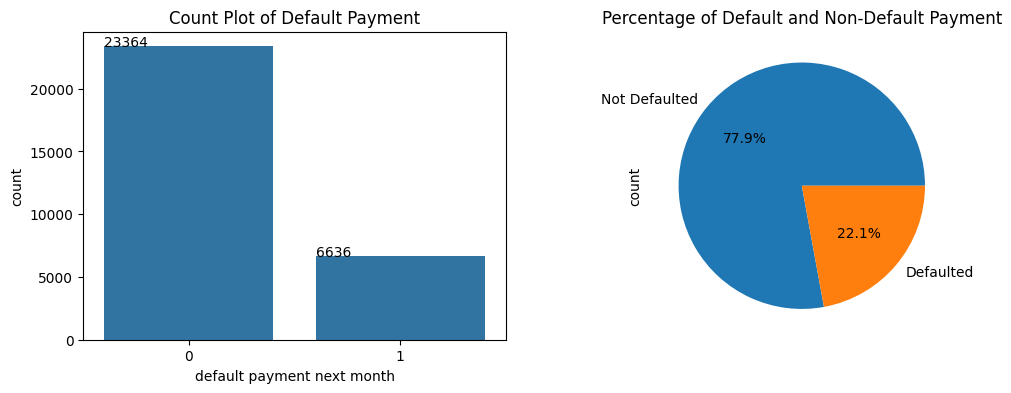

In [65]:

fig,ax = plt.subplots(1,2, figsize=(12,4))

# Univariate analysis
# Count Plot of Default Payment
count = sns.countplot(data=dataset, x='default payment next month', ax=ax[0])
count.set_title('Count Plot of Default Payment')

# adding value count on the top of bar
for p in count.patches:
  count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Univariate analysis
# Percentage of Default and Non-Default Payment
pie = dataset['default payment next month'].value_counts().plot(kind='pie',autopct="%1.1f%%",labels=['Not Defaulted','Defaulted'], ax=ax[1])
pie.set_title('Percentage of Default and Non-Default Payment')

###observation:
only 22.1% defaults

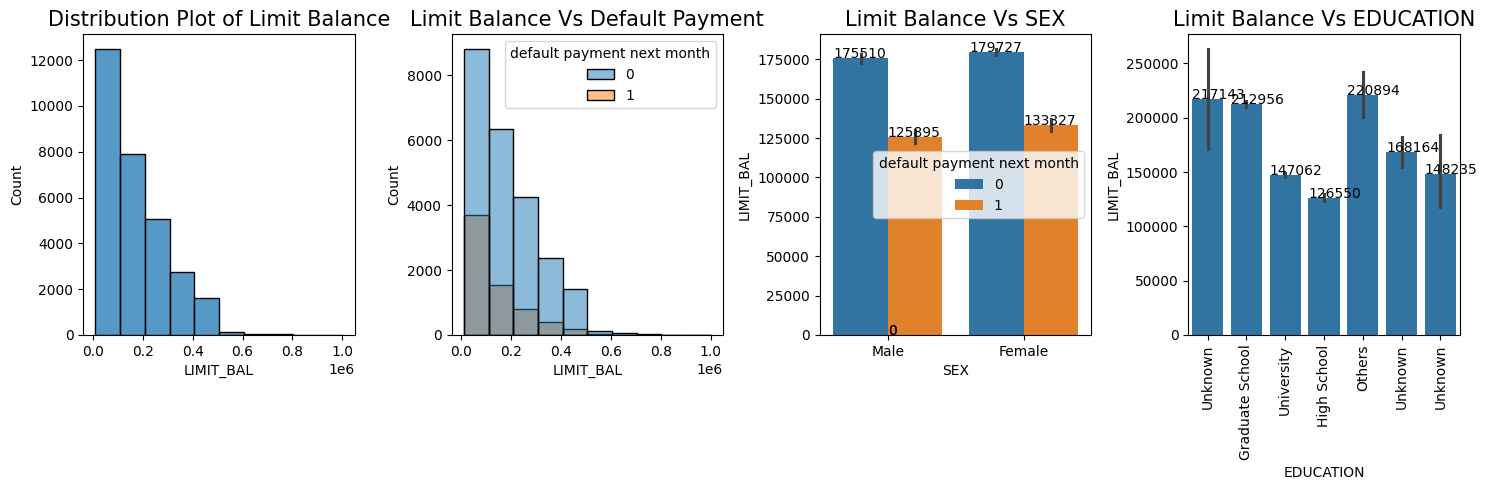

In [66]:
ig,ax = plt.subplots(1,4, figsize=(15,5))

# Distribution analysis of Limit Balance
hist = sns.histplot(dataset['LIMIT_BAL'],bins=10, ax=ax[0])
hist.set_title('Distribution Plot of Limit Balance', size=15)

# Bi-variate analysis
# Limit Balance Vs Default Payment
hist = sns.histplot(data=dataset, x='LIMIT_BAL', hue='default payment next month',bins=10, ax=ax[1])
hist.set_title('Limit Balance Vs Default Payment', size=15)

# Multi-variate analysis
# Limit Balance Vs SEX
bar = sns.barplot(data=dataset, x='SEX', y='LIMIT_BAL',hue='default payment next month', ax=ax[2])
bar.set_title('Limit Balance Vs SEX', size=15)

# adding value count on the top of bar
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories
# Gender (1=male, 2=female)
bar.set_xticklabels(['Male', 'Female'])

# Bi-variate analysis
# Limit Balance Vs EDUCATION
bar = sns.barplot(data=dataset, x='EDUCATION', y='LIMIT_BAL', ax=ax[3])
bar.set_title('Limit Balance Vs EDUCATION', size=15)

# adding value count on the top of bar
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories
# EDUCATION (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
bar.set_xticklabels(['Unknown','Graduate School', 'University', 'High School', 'Others', 'Unknown', 'Unknown'])

# Set x-ticks rotation to 90 degrees
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observation:**

* Most of the customers get up to 2 lakhs
of credit limit balance.
* There appears to be a negative correlation between the percentage of defaults and credit limit.
* On average females gets more limit than males. The female has an average of 170k while the male has an average of 163k.
* Graph also indicates that higher education means a higher credit limit. We have to categorize all the unknown education categories as one.





In [67]:
print(dataset.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [68]:

# Missing Values/Null Values Count
print(dataset.isnull().sum())


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [70]:
# Creating few columns to consolidate all the bill amounts
dataset['Sum_all_bill'] = dataset['BILL_AMT1']+dataset['BILL_AMT2']+dataset['BILL_AMT3']+\
                             dataset['BILL_AMT4']+dataset['BILL_AMT5']+dataset['BILL_AMT6']

dataset['Avg_bill'] =    (dataset['BILL_AMT1']+dataset['BILL_AMT2']+dataset['BILL_AMT3']+\
                             dataset['BILL_AMT4']+dataset['BILL_AMT5']+dataset['BILL_AMT6'])/6


In [71]:
# Creating few columns to consolidate all the bill amounts
dataset['Sum_all_pay_amount'] = dataset['PAY_AMT1']+dataset['PAY_AMT2']+dataset['PAY_AMT3']+\
                             dataset['PAY_AMT4']+dataset['PAY_AMT5']+dataset['PAY_AMT6']

dataset['Avg_pay_amount'] =    (dataset['PAY_AMT1']+dataset['PAY_AMT2']+dataset['PAY_AMT3']+\
                             dataset['PAY_AMT4']+dataset['PAY_AMT5']+dataset['PAY_AMT6'])/6


In [73]:
# copying this data to protect the work done till now
df_feature = dataset.copy()


numerical_features = []
categorical_features = []

# splitting features into numeric and categoric.
'''
If feature has more than 15 categories we will consider it
as numerical_features, remaining features will be added to categorical_features.
'''
for col in df_feature.columns:
  if df_feature[col].nunique() > 15:
    numerical_features.append(col)
  else:
    categorical_features.append(col)

print(f'Numerical Features : {numerical_features}')
print(f'Categorical Features : {categorical_features}')

Numerical Features : ['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Sum_all_bill', 'Avg_bill', 'Sum_all_pay_amount', 'Avg_pay_amount']
Categorical Features : ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month']


In [75]:
#dropping negative bills
df_feature = df_feature[df_feature['BILL_AMT1'] >= 0]

In [76]:
# Lambda Function can be used to convert all unknown sub-category as one unknown sub-category
df_feature['EDUCATION'] = df_feature['EDUCATION'].apply(lambda x: 4 if x in [0, 5, 6] else x)
df_feature['EDUCATION'].value_counts()
#

,count
EDUCATION,
2,13815
1,10301
3,4835
4,459


In [77]:
categorical_features.remove('default payment next month')

In [34]:
# Check Unique Values for each categorical variable.
for i in categorical_features:
  print("No. of unique values in",i,"is",df_feature[i].nunique())


No. of unique values in SEX is 2
No. of unique values in EDUCATION is 4
No. of unique values in MARRIAGE is 4
No. of unique values in PAY_0 is 11
No. of unique values in PAY_2 is 11
No. of unique values in PAY_3 is 11
No. of unique values in PAY_4 is 11
No. of unique values in PAY_5 is 10
No. of unique values in PAY_6 is 10


In [78]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29410 entries, 0 to 29999
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          29410 non-null  int64  
 1   LIMIT_BAL                   29410 non-null  int64  
 2   SEX                         29410 non-null  int64  
 3   EDUCATION                   29410 non-null  int64  
 4   MARRIAGE                    29410 non-null  int64  
 5   AGE                         29410 non-null  int64  
 6   PAY_0                       29410 non-null  int64  
 7   PAY_2                       29410 non-null  int64  
 8   PAY_3                       29410 non-null  int64  
 9   PAY_4                       29410 non-null  int64  
 10  PAY_5                       29410 non-null  int64  
 11  PAY_6                       29410 non-null  int64  
 12  BILL_AMT1                   29410 non-null  int64  
 13  BILL_AMT2                   29410 no

In [79]:


# Cast values in the categorical columns as type str.                 # can use astype('category') too.
df_feature[categorical_features] = df_feature[categorical_features].astype(str)

# checking the result
df_feature.dtypes

,0
ID,int64
LIMIT_BAL,int64
SEX,object
EDUCATION,object
MARRIAGE,object
AGE,int64
PAY_0,object
PAY_2,object
PAY_3,object
PAY_4,object


<Axes: >

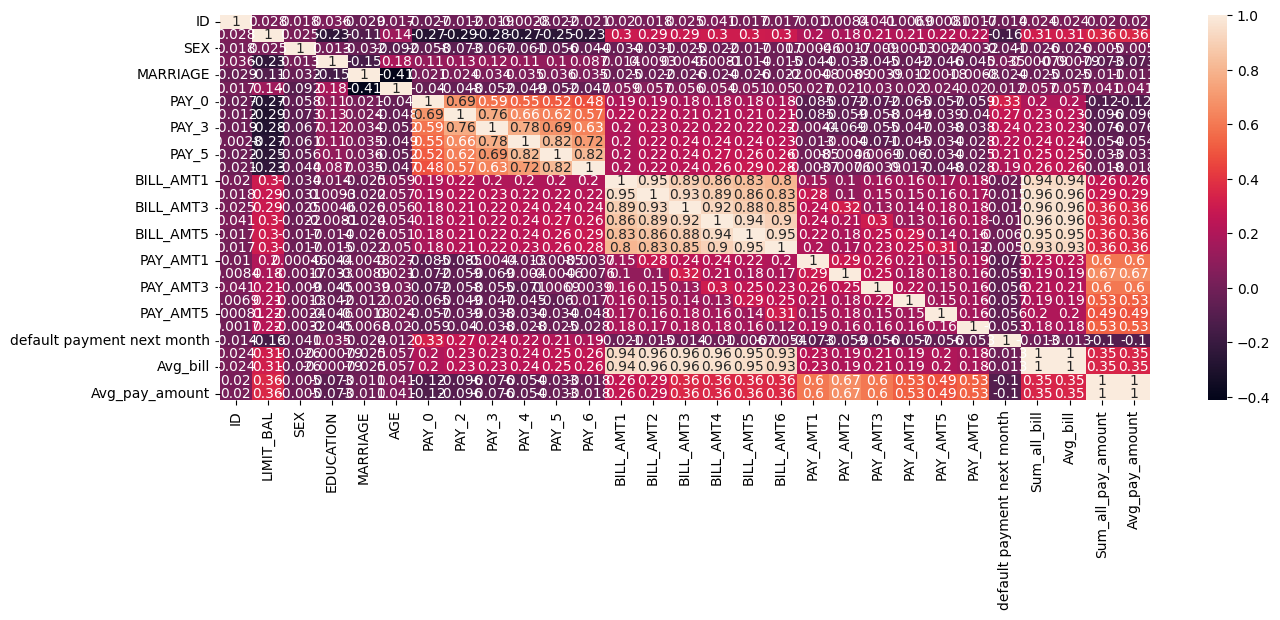

In [80]:
# Plotting correlation heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df_feature.corr(), annot=True)

In [81]:
# find and remove correlated features

def correlation(dataset, threshold):
    col_corr = set()                                           # Set of all the names of correlated features
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:        # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]               # getting the name of column
                col_corr.add(colname)
    return col_corr

In [82]:
df_feature.drop(['Avg_bill','Avg_pay_amount','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','Sum_all_bill'], axis=1, inplace=True)


<Axes: >

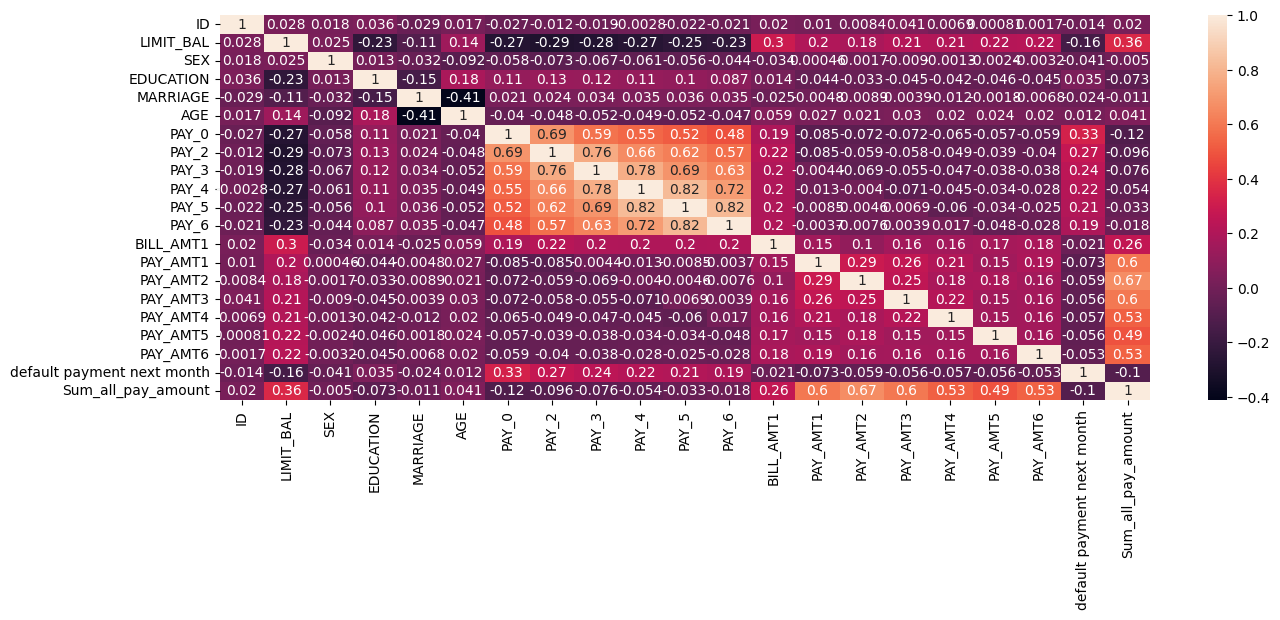

In [83]:
plt.figure(figsize=(15,5))
sns.heatmap(df_feature.corr(), annot=True)


In [84]:
df_feature.drop('ID',axis = 1, inplace = True)

# Dropping Sum_all_pay_amount because it was created for EDA
df_feature.drop(['Sum_all_pay_amount'],axis=1, inplace=True)


In [90]:
from collections import Counter
from imblearn.over_sampling import SMOTE

X = df_feature.drop(columns='default payment next month')     # independent features
y = df_feature['default payment next month']                  # dependent features

print(f'Before Handling Imbalanced class {Counter(y)}')

# Resampling the minority class
smote = SMOTE(random_state=42)

# fit predictor and target variable
X, y = smote.fit_resample(X, y)

print(f'After Handling Imbalanced class {Counter(y)}')

Before Handling Imbalanced class Counter({0: 22883, 1: 6527})
After Handling Imbalanced class Counter({1: 22883, 0: 22883})


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(36612, 18)
(9154, 18)


###Scaling data


In [92]:
# Scaling Data

# Initialize the scaler
scaler = StandardScaler()

# Scale the features using StandardScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
model_result = []

def predict(ml_model, model_name):

  '''
  Pass the model and predict value.
  Function will calculate all the eveluation metrics and appending those metrics score on model_result table.
  Plotting confusion_matrix and roc_curve for test data.
  '''

  # model fitting
  model = ml_model.fit(X_train, y_train)

  # predicting value and probability
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  y_train_prob = model.predict_proba(X_train)[:,1]
  y_test_prob = model.predict_proba(X_test)[:,1]


  ''' Performance Metrics '''
  # accuracy score  ---->  (TP+TN)/(TP+FP+TN+FN)
  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  print(f'train accuracy : {round(train_accuracy,3)}')
  print(f'test accuracy : {round(test_accuracy,3)}')

  # precision score  ---->  TP/(TP+FP)
  train_precision = precision_score(y_train, y_train_pred)
  test_precision = precision_score(y_test, y_test_pred)
  print(f'train precision : {round(train_precision,3)}')
  print(f'test precision : {round(test_precision,3)}')

  # recall score  ---->  TP/(TP+FN)
  train_recall = recall_score(y_train, y_train_pred)
  test_recall = recall_score(y_test, y_test_pred)
  print(f'train recall : {round(train_recall,3)}')
  print(f'test recall : {round(test_recall,3)}')

  # f1 score  ---->  Harmonic Mean of Precision and Recall
  train_f1 = f1_score(y_train, y_train_pred)
  test_f1 = f1_score(y_test, y_test_pred)
  print(f'train f1 : {round(train_f1,3)}')
  print(f'test f1 : {round(test_f1,3)}')

  # roc_auc score  ---->  It shows how well the model can differentiate between classes.
  train_roc_auc = roc_auc_score(y_train, y_train_prob)
  test_roc_auc = roc_auc_score(y_test, y_test_prob)
  print(f'train roc_auc : {round(train_roc_auc,3)}')
  print(f'test roc_auc : {round(test_roc_auc,3)}')
  print('-'*80)

  # classification report
  print(f'classification report for test data \n{classification_report(y_test, y_test_pred)}')
  print('-'*80)


  ''' plotting Confusion Matrix '''
  ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
  plt.title('confusion matrix on Test data', weight='bold')
  plt.show()
  print('-'*80)


  ''' actual value vs predicted value on test data'''
  d = {'y_actual':y_test, 'y_predict':y_test_pred}
  print(pd.DataFrame(data=d).head(10).T)                   # constructing a dataframe with both actual and predicted values
  print('-'*80)

  '''Calculate threshold values for K-S chart'''

  # Compute the false positive rate, true positive rate, and thresholds for the ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

  # Calculate the maximum difference between the true positive rate and false positive rate
  ks_stat = tpr - fpr

  # Compute the threshold that maximizes the difference between the false positive rate and the true positive rate
  ks_threshold = thresholds[np.argmax(ks_stat)]

  # Plot the KS chart
  plt.plot(thresholds, tpr, label='True Positive Rate')
  plt.plot(thresholds, fpr, label='False Positive Rate')
  plt.plot(thresholds, ks_stat, label='KS Statistic')
  plt.axvline(ks_threshold, color='black', linestyle='--', label=f'KS Threshold: {ks_threshold:.2f}')
  plt.title('KS Chart')
  plt.xlabel('Threshold')
  plt.ylabel('Rate')
  plt.legend()
  plt.show()


  '''Using the score from the performance metrics to create the final model_result'''
  model_result.append({'model':model_name,
                       'train_accuracy':train_accuracy,
                       'test_accuracy':test_accuracy,
                       'train_precision':train_precision,
                       'test_precision':test_precision,
                       'train_recall':train_recall,
                       'test_recall':test_recall,
                       'train_f1':train_f1,
                       'test_f1':test_f1,
                       'train_roc_auc':train_roc_auc,
                       'test_roc_auc':test_roc_auc})


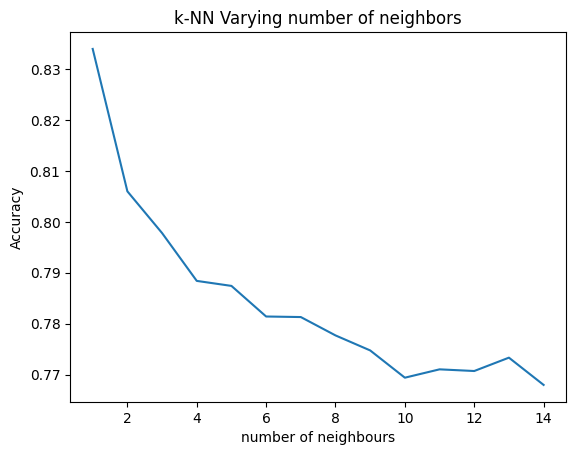

In [94]:
accuracy=[]

# Iteratig for the optimum values of k
for i in range(1,15):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  accuracy.append(knn.score(X_test, y_test))

#plotting the k-value vs accuracy
plt.title('k-NN Varying number of neighbors')
plt.plot(range(1,15), accuracy)
plt.xlabel('number of neighbours')
plt.ylabel('Accuracy')
plt.show()

train accuracy : 1.0
test accuracy : 0.834
train precision : 1.0
test precision : 0.811
train recall : 1.0
test recall : 0.872
train f1 : 1.0
test f1 : 0.84
train roc_auc : 1.0
test roc_auc : 0.834
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      4569
           1       0.81      0.87      0.84      4585

    accuracy                           0.83      9154
   macro avg       0.84      0.83      0.83      9154
weighted avg       0.84      0.83      0.83      9154

--------------------------------------------------------------------------------


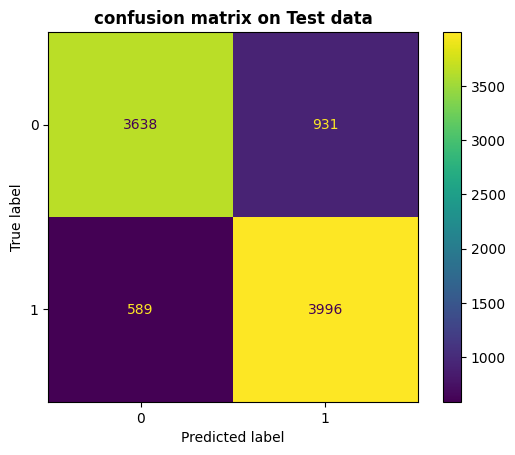

--------------------------------------------------------------------------------
           11269  29108  1900   25071  681    8993   44799  1219   7679   \
y_actual       0      0      0      0      0      1      1      0      0   
y_predict      0      0      0      0      1      0      1      0      0   

           14092  
y_actual       0  
y_predict      0  
--------------------------------------------------------------------------------


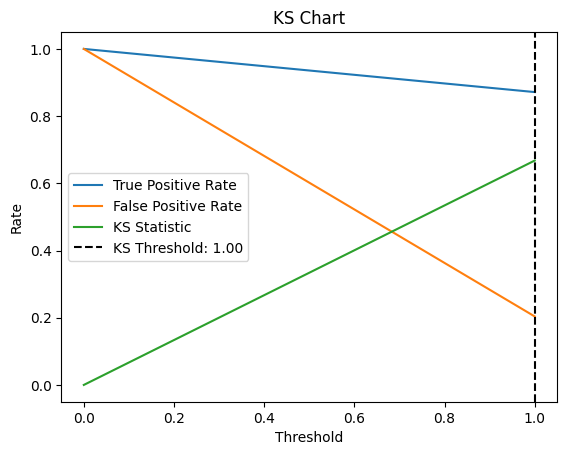

In [95]:
predict(KNeighborsClassifier(n_neighbors=1), 'KNN')

In [96]:

model_result = pd.DataFrame(model_result)
round(model_result,3)

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,train_roc_auc,test_roc_auc
0,KNN,1.0,0.834,1.0,0.811,1.0,0.872,1.0,0.84,1.0,0.834


In [97]:
import joblib

# Save
joblib.dump(knn, 'knn_credit_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Load later
knn = joblib.load('knn_credit_model.pkl')
scaler = joblib.load('scaler.pkl')